#### Importamos libreiras

In [41]:
import pandas as pd
import numpy as np
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
import pickle

import matplotlib.pyplot as plt

#### Cargar el dataset

In [2]:
df = pd.read_csv(r"C:\Users\adria\Desktop\Mi primer proyecto\Proyecto_ML\data\processed\temp_spain_clear.csv",index_col='dt')

#### Pasar el index (fecha) como datetime

In [3]:
df.index = pd.to_datetime(df.index)

#### Seleccionar desde el año 1800

In [4]:
df = df.loc['1800':]

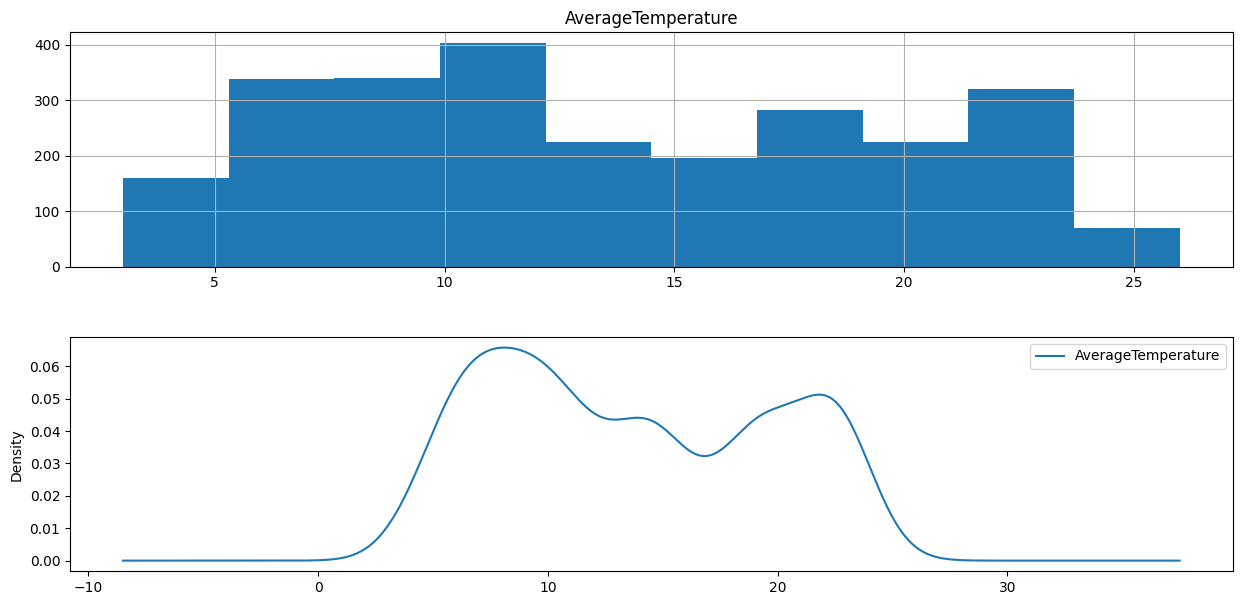

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,7))
df.hist(ax=ax1)
df.plot(kind='kde',ax=ax2)
plt.show()

In [6]:
print ('Resultados del test Dickey-Fuller:')
dftest = adfuller(df)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Resultados del test Dickey-Fuller:
Test Statistic                   -4.311676
p-value                           0.000424
#Lags Used                       26.000000
Number of Observations Used    2529.000000
Critical Value (1%)              -3.432938
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


In [7]:
df.index = pd.date_range(start='1990-01-01',periods=df.shape[0],freq='M')

In [8]:
step = 240
train = df[:step]
test  = df[step:]

In [9]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=2023),
                lags = 15
             )

forecaster.fit(y=train['AverageTemperature'])

In [10]:
predicciones = forecaster.predict(steps=step)
predicciones.head(5)

2010-01-31     5.66
2010-02-28     6.83
2010-03-31     9.46
2010-04-30    11.39
2010-05-31    14.60
Freq: M, Name: pred, dtype: float64

#### Pintar predicciones por 20 años

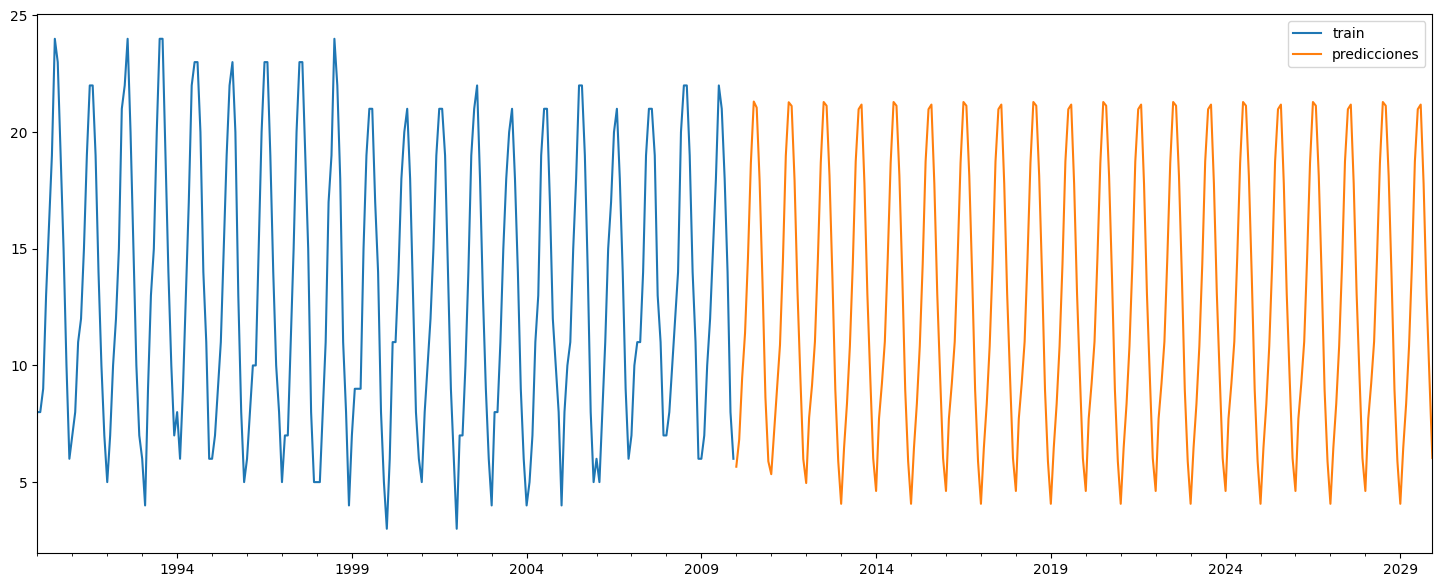

In [11]:
fig, ax = plt.subplots(figsize=(18, 7))
train['AverageTemperature'].plot(ax=ax, label='train')
#test['AverageTemperature'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

#### Guardamos el modelo entrenado

In [43]:
"""with open(r"C:\Users\adria\Desktop\Mi primer proyecto\Proyecto_ML\model\forecaster.pickle", "wb") as f:
    pickle.dump(forecaster, f)"""

#### Con este comando leemos el archivo guardado anteriormente

In [ ]:
"""with open(r"C:\Users\adria\Desktop\Mi primer proyecto\Proyecto_ML\model\forecaster.pickle", "rb") as f:
    forecaster_pick = pickle.load(f)
print(forecaster_pick)"""